In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

In [3]:
import os
import sys
stbl_root_path = os.path.abspath('..')
if stbl_root_path not in sys.path:
    print('inserting the following to path',stbl_root_path)
    sys.path.insert(0,os.path.abspath('..'))
    print(sys.path)

inserting the following to path /home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines
['/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines', '/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines/my_colabs', '/opt/anaconda3/envs/tf15/lib/python37.zip', '/opt/anaconda3/envs/tf15/lib/python3.7', '/opt/anaconda3/envs/tf15/lib/python3.7/lib-dynload', '', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages/IPython/extensions', '/home/gkoren2/.ipython']


In [4]:
import numpy as np
import tensorflow as tf
import gym
import pandas as pd
from my_zoo.utils.common import suppress_tensorflow_warnings, set_gpu_device
set_gpu_device('0')
suppress_tensorflow_warnings()
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib notebook

1 Physical GPUs, 1 Logical GPU
1.15.0


In [5]:
from stable_baselines.dbcq.dbcq import DBCQ
from stable_baselines.dbcq.expert_dataset import generate_experience_traj,load_experience_traj

In [6]:
data_path=os.path.join(os.path.expanduser('~'),'share/Data/MLA/L2P')
rl_data_path=os.path.join(os.path.expanduser('~'),'share/Data/MLA/stbl/erbufs')
print(data_path,rl_data_path)

/home/gkoren2/share/Data/MLA/L2P /home/gkoren2/share/Data/MLA/stbl/erbufs


# Start experiment here

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_csv-18-03-2020_10-24-21/1/model_params.zip'
model = DBCQ.load(model_file_name)

In [ ]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_data_rnd_RL.npz'
data=np.load(data_file_name,allow_pickle=True)
len(data['actions'])

In [ ]:
Y=data['actions']
X=data['obs']
X.shape

In [ ]:
y_pred=model.predict(X,deterministic=True)

In [ ]:
plt.hist(y_pred[0],bins=4)

## Train on L2_ww31_rnd_mnmxscaled.csv , test on L2_ww31_oracle_mnmxscaled.csv
we'll have to load it from csv

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv_mnmx-22-03-2020_08-47-57/1/model_params.zip'
model = DBCQ.load(model_file_name)

In [ ]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle_mnmxscaled.csv'
data=load_experience_traj(data_file_name)
len(data['actions'])

In [ ]:
Y=data['actions']
X=data['obs']
X.shape

In [ ]:
plt.plot(Y)

OK, the oracle's signal looks very artificial. its has a clear cyclic pattern. is that really an oracle ? there's no point in comparing to the oracle - only through the reward

In [ ]:
y_pred=model.predict(X,deterministic=True)

In [ ]:
# check accuracy
plt.hist(y_pred[0],bins=4)

## Train on L2_ww31_rnd.csv, test on L2_ww31_oracle.csv

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv-22-03-2020_08-48-38/1/model_params.zip'
model2 = DBCQ.load(model_file_name)

In [ ]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle.csv'
data=load_experience_traj(data_file_name)
len(data['actions'])

In [ ]:
Y2=data['actions']
X2=data['obs']
X2.shape

In [ ]:
y2_pred=model2.predict(X2,deterministic=True)

In [ ]:
plt.hist(y2_pred[0],bins=4)

# Test procedure
In the test procedure we'll walk through the whole process from the file we get from L2P ETL until we can feed it to the model.  
The process is as follows:
1. add a dummy column `category_id` to the csv and save back
1. from `L2_data_random_for_RL_Batch.csv` to `L2_data_random_for_RL_Batch_exp.csv` : run `etl4rl.py L2_data_random_for_RL_Batch.csv`
1. load `L2_data_rnd_RL_exp.csv`: using `load_experience_traj` 
1. load the model: see above how to do it
1. `y2_pred=model2.predict(data['obs'],deterministic=True)`

In [24]:
# load the file as you get it from Michal 
input_file = os.path.join(data_path,'L2_data_test_for_RL_Batch.csv')
df=pd.read_csv(input_file,index_col=0)
df.head()

,trace,trace_phase,group_id,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit,category_id
0,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.381840,0.000000,0.002660,0.290084,0.000375,0.0,0.003882,-1
1,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.388933,0.000000,0.002611,0.272804,0.000310,0.0,0.003864,-1
2,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.373650,0.000000,0.002831,0.173149,0.000250,0.0,0.003939,-1
3,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.401007,0.001144,0.003530,0.153584,0.000190,0.0,0.003778,-1
4,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.665478,0.000186,0.000420,0.025274,0.000020,0.0,0.002773,-1


In [25]:
# if needed, convert it to csv experience file (optionally with scaling)
# !python /home/gkoren2/PycharmProjects/remote/MLA/RL/L2_prefetcher/ETL/etl4rl.py $input_file -s

reading the input csv from /home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch.csv
start converting the input csv...
found 3036 episodes
scaling the data using minmax scaler
done converting. saving to output /home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_exp_scaled.csv
done


In [26]:
# load the experience data and extract the observations into X
data_file_name =  '/home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_exp_scaled.csv'
data=load_experience_traj(data_file_name)
X=data['obs']
X.shape

loading from csv and saving a cache file in /home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_exp_scaled.npz


100%|██████████| 3036/3036 [02:15<00:00, 22.33it/s]


(413680, 7)

In [27]:
# load the model to perform the predictions
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_csv-19-03-2020_17-36-39/1/model_params.zip'
model = DBCQ.load(model_file_name)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


<IPython.core.display.Javascript object>


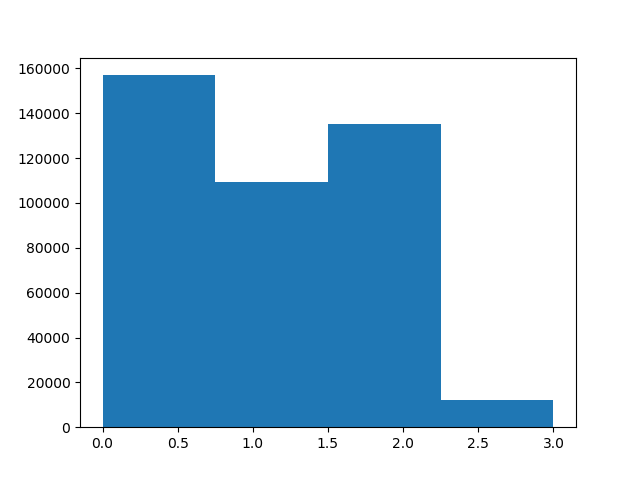

(array([156986., 109301., 135071.,  12322.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

In [29]:
# perform the predictions
y_pred=model.predict(X,deterministic=True)
plt.hist(y_pred[0],bins=[b+0.5 for b in range(-1,4)])

now we have the predictions in `y_pred[0]` and the observations in `X`. we want to pack it to csv file.  
**However**, since the preprocessing flow in `etl4rl.py` shifted samples, threw away the first row and (optioally) scaled them the number of rows in the original file is different then `X.shape[0]`.  
so in the following cell we load again the file before scaling s.t. we extract the observations as is and we'll add them to the result file so to align the states at the input to the model.

In [55]:
# load the experience file without scaling (simply by running etl4rl.py without the -s option)
data_file_name =  '/home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_exp.csv'
data=load_experience_traj(data_file_name)
data['obs'].shape

loading from csv and saving a cache file in /home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_exp.npz


100%|██████████| 3036/3036 [02:13<00:00, 22.67it/s]


(413680, 7)

In [68]:
# load the original column names from the original file
input_file = os.path.join(data_path,'L2_data_test_for_RL_Batch.csv')
df=pd.read_csv(input_file,index_col=0,nrows=1)
df.columns

Index(['trace', 'trace_phase', 'group_id', 'ipc', 'stall_l2m', 'stall_l1m',
       'sq_occupancy', 'l2_prefetch_alloc', 'l2_useless_prefetch', 'l2_hit'],
      dtype='object')

In [60]:
# create the columns for the results file
cols=list(df.columns)[-7:]+['rl_predictions']
cols

['ipc',
 'stall_l2m',
 'stall_l1m',
 'sq_occupancy',
 'l2_prefetch_alloc',
 'l2_useless_prefetch',
 'l2_hit',
 'rl_predictions']

In [62]:
# create the dataframe of the results
pred_df=pd.DataFrame(np.concatenate([data['obs'],y_pred[0][:,None]],axis=-1),columns=cols)
pred_df.head()

,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit,rl_predictions
0,4.381840,0.000000,0.002660,0.290084,0.000375,0.0,0.003882,2.0
1,4.388933,0.000000,0.002611,0.272804,0.000310,0.0,0.003864,2.0
2,4.373650,0.000000,0.002831,0.173149,0.000250,0.0,0.003939,2.0
3,4.401007,0.001144,0.003530,0.153584,0.000190,0.0,0.003778,2.0
4,4.665478,0.000186,0.000420,0.025274,0.000020,0.0,0.002773,2.0


In [63]:
# pred_file_name=os.path.splitext(data_file_name)[0]+'_pred.csv'        # uncomment if you didnt use the scaled file
pred_file_name=os.path.splitext(data_file_name)[0]+'_scaled_pred.csv'   # uncomment if you used the scaled file
print('saving to '+pred_file_name)
pred_df.to_csv(pred_file_name,index=False)

saving to /home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_exp_pred.csv


In [64]:
pred_df=pd.read_csv(pred_file_name)
pred_df.head()

,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit,rl_predictions
0,4.381840,0.000000,0.002660,0.290084,0.000375,0.0,0.003882,2.0
1,4.388933,0.000000,0.002611,0.272804,0.000310,0.0,0.003864,2.0
2,4.373650,0.000000,0.002831,0.173149,0.000250,0.0,0.003939,2.0
3,4.401007,0.001144,0.003530,0.153584,0.000190,0.0,0.003778,2.0
4,4.665478,0.000186,0.000420,0.025274,0.000020,0.0,0.002773,2.0
